# Library Import & Data Load

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
save_dir = ('./data/dacon_news_data.csv')
df = pd.read_csv(save_dir)
print(df.head())

   index                             title  topic_idx
0      0          인천→핀란드 항공기 결항…휴가철 여행객 분통          4
1      1    실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4
2      2    이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4
3      3  NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4
4      4         시진핑 트럼프에 중미 무역협상 조속 타결 희망          4


In [3]:
len(df)

14991

# Preprocessing


### 1. 특수기호 제거

In [4]:
# 특수기호 제거
df['clean_title'] = df['title'].map(lambda x : re.sub(pattern='[^\w\s]', repl=' ', string= x))

In [5]:
df['clean_title']

0                  인천 핀란드 항공기 결항 휴가철 여행객 분통
1            실리콘밸리 넘어서겠다 구글 15조원 들여 美전역 거점화
2            이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3          NYT 클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합
4                 시진핑 트럼프에 중미 무역협상 조속 타결 희망
                        ...                
14986        남친과 함께 잔혹하게 동거인 학대 20대 여성 구속영장
14987            일왕 부부 16일 동일본대지진 피해지역 위로방문
14988       1보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토
14989                     답변하는 배기동 국립중앙박물관장
14990    2020 한국인터넷기자상 시상식 내달 1일 개최 특별상 김성후
Name: clean_title, Length: 14991, dtype: object

### 2. 품사 태깅

In [6]:
from eunjeon import Mecab

mecab = Mecab()

text = "NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합"
print(f"pos: {mecab.pos(text)}")
print(f"nouns: {mecab.nouns(text)}")
print(f"nouns + SL: {mecab.nouns_and_foreign(text)}")

pos: [('NYT', 'SL'), ('클린턴', 'NNP'), ('측근', 'NNG'), ('韓', 'NNG'), ('기업', 'NNG'), ('특수', 'NNG'), ('관계', 'NNG'), ('조명', 'NNG'), ('…', 'SE'), ('공과', 'NNG'), ('사', 'VV+EC'), ('맞물려', 'VV+EC'), ('종합', 'NNG')]
nouns: ['클린턴', '측근', '韓', '기업', '특수', '관계', '조명', '공과', '종합']
nouns + SL: ['NYT', '클린턴', '측근', '韓', '기업', '특수', '관계', '조명', '공과', '종합']


In [7]:
# 전체 title pos tagging
df['tagged_title'] = df['clean_title'].map(lambda x : mecab.pos(x))

In [8]:
df['tagged_title']

0        [(인천, NNP), (핀란드, NNP), (항공기, NNG), (결항, NNG),...
1        [(실리콘밸리, NNP), (넘어서, VV), (겠, EP), (다, EC), (구...
2        [(이란, NNP), (외무, NNG), (긴장, NNG), (완화, NNG), (...
3        [(NYT, SL), (클린턴, NNP), (측근, NNG), (韓, NNG), (...
4        [(시진핑, NNP), (트럼프, NNG), (에, JKB), (중미, NNG), ...
                               ...                        
14986    [(남친, NNG), (과, JKB), (함께, MAG), (잔혹, NNG), (하...
14987    [(일, NR), (왕, NNG), (부부, NNG), (16, SN), (일, N...
14988    [(1, SN), (보, NNBC), (서울시, NNP), (교육청, NNG), (...
14989    [(답변, NNG), (하, XSV), (는, ETM), (배기동, NNP), (국...
14990    [(2020, SN), (한국, NNP), (인터넷, NNG), (기자상, NNG)...
Name: tagged_title, Length: 14991, dtype: object

In [9]:
# 명사와 외국어만 추출
df['NSL_title'] = df['clean_title'].map(lambda x : mecab.nouns_and_foreign(x))

In [10]:
df.head()

,index,title,topic_idx,clean_title,tagged_title,NSL_title
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천 핀란드 항공기 결항 휴가철 여행객 분통,"[(인천, NNP), (핀란드, NNP), (항공기, NNG), (결항, NNG),...","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다 구글 15조원 들여 美전역 거점화,"[(실리콘밸리, NNP), (넘어서, VV), (겠, EP), (다, EC), (구...","[실리콘밸리, 구글, 조, 원, 美, 전역, 거점]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,"[(이란, NNP), (외무, NNG), (긴장, NNG), (완화, NNG), (...","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 것]"
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합,"[(NYT, SL), (클린턴, NNP), (측근, NNG), (韓, NNG), (...","[NYT, 클린턴, 측근, 韓, 기업, 특수, 관계, 조명, 공과, 종합]"
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,"[(시진핑, NNP), (트럼프, NNG), (에, JKB), (중미, NNG), ...","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]"


### 3. 사용자 정의 불용어 제거

In [11]:
import codecs

# 불용어 사전 불러오기
_stopwords = codecs.open("./data/custom_stopwords.txt",  'r', 'utf-8')
lines = _stopwords.readlines()
_stopwords = [line.strip().split()[0] for line in lines]
len(_stopwords)

100

In [12]:
df['tokenized'] = df['NSL_title'].map(lambda x : [word for word in x if not word in _stopwords])

In [13]:
df['tokenized']

0                 [인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]
1                        [실리콘밸리, 구글, 조, 美, 전역, 거점]
2                [이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁]
3        [NYT, 클린턴, 측근, 韓, 기업, 특수, 관계, 조명, 공과, 종합]
4               [시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]
                           ...                    
14986             [남친, 잔혹, 동거인, 학대, 대, 여성, 구속, 영장]
14987             [왕, 부부, 동일본, 대지진, 피해, 지역, 위, 방문]
14988      [서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]
14989                    [답변, 배기동, 국립, 중앙, 박물, 관장]
14990        [한국, 인터넷, 기자상, 시상식, 내달, 개최, 특별상, 김성후]
Name: tokenized, Length: 14991, dtype: object

# Evaluation of preprocessing performance
through the performance of the news topic binary classification task.

In [58]:
df['topic_idx_2'] = df['topic_idx'].map(lambda x : 0 if x==2 else 1)

In [59]:
df['topic_idx_2']

0        1
1        1
2        1
3        1
4        1
        ..
14986    0
14987    1
14988    0
14989    0
14990    0
Name: topic_idx_2, Length: 14991, dtype: int64

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
X_data = df['tokenized']
y_data = df['topic_idx_2']

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)
print(sequences[:5])

[[187, 3102, 1391, 2778, 8236, 2099, 4015], [3494, 776, 218, 2, 3103, 1710], [6, 178, 340, 476, 3495, 20, 64, 155], [1594, 956, 1314, 529, 46, 621, 341, 1711, 5964, 1], [152, 3, 2100, 109, 55, 4016, 1480, 602]]


In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

In [64]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 6251
단어 집합(vocabulary)에서 희귀 단어의 비율: 43.15200883611763
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.369767461837799


In [65]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 14487


In [66]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 11992
테스트 데이터의 개수: 2999


기사제목의 최대 길이 : 15
기사제목의 평균 길이 : 7.765393


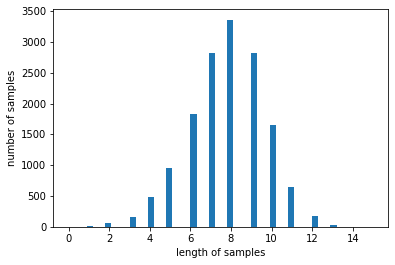

In [67]:
X_data = sequences
print('기사제목의 최대 길이 : %d' % max(len(l) for l in X_data))
print('기사제목의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [68]:
max_len = 15
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (14991, 15)


In [69]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

## Train RNN model

In [70]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [71]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
150/150 [==============================] - 2s 5ms/step - loss: 0.3852 - acc: 0.8231 - val_loss: 0.3108 - val_acc: 0.8908
Epoch 2/4
150/150 [==============================] - 1s 5ms/step - loss: 0.1331 - acc: 0.9532 - val_loss: 0.1607 - val_acc: 0.9454
Epoch 3/4
150/150 [==============================] - 1s 5ms/step - loss: 0.0841 - acc: 0.9739 - val_loss: 0.1411 - val_acc: 0.9529
Epoch 4/4
150/150 [==============================] - 1s 5ms/step - loss: 0.0603 - acc: 0.9799 - val_loss: 0.1500 - val_acc: 0.9500


In [72]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

94/94 [==============================] - 0s 1ms/step - loss: 0.1759 - acc: 0.9420

 테스트 정확도: 0.9420
